# Previs√£o de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as an√°lises
- Seu Github com o projeto
- V√≠deo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do neg√≥cio

Uma institui√ß√£o financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cart√µes de cr√©dito dos novos clientes, sem necessariamente solicitar olerites ou documenta√ß√µes que impactem na experi√™ncia do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas atrav√©s de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas vari√°veis que j√° possui em seu banco de dados.

O objetivo deste exercic√≠o √© simular um modelo real de previs√£o de renda e se o cliente √© um bom ou mau pagador, iremos utilizar a metodologia CRISP-DM para montar o projeto.


## Etapa 2 Crisp-DM: Entendimento dos dados

A base de dados utilizada neste projeto foi disponibilizada pela EBAC no Modulo 10 do curso de ciencia de dados.

### Dicion√°rio de dados




| Vari√°vel                | Descri√ß√£o                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de refer√™ncia de coleta das vari√°veis         | object|
| id_cliente              |  Codigo identificador do cliente                                   |int|
| sexo                    |  Sexo do cliente                                      | object|
| posse_de_veiculo        |  Indica se o cliente possui ve√≠culo                                      | bool|
| posse_de_imovel         |  Indica se o cliente possui im√≥vel                                      | bool|
| qtd_filhos              |  Quantidade de filhos do cliente                                      | int|
| tipo_renda              |  Tipo de renda do cliente                                      | object|
| educacao                |  Grau de instru√ß√£o do cliente                                      | object|
| estado_civil            |  Estado civil do cliente                                      | object|
| tipo_residencia         |  Tipo de resid√™ncia do cliente (pr√≥pria, alugada etc)                                     | object|
| idade                   |  Idade do cliente                                    | int|
| tempo_emprego           |  Tempo no emprego atual                                     | float|
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na resid√™ncia                                      | float|
| renda                   |  Indica se o cliente √© mau pagador                                      | float|





#### Carregando os pacotes
√â considerado uma boa pr√°tica carregar os pacotes que ser√£o utilizados como a primeira coisa do programa.

#### Carregando os dados
O comando pd.read_csv √© um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [22]:
import pandas as pd  
import seaborn as sns  
import numpy as np  
import matplotlib.pyplot as plt  
from ydata_profiling import ProfileReport  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.metrics import mean_squared_error 
from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import io  
import re  
import statsmodels.api as sm

%matplotlib inline

In [23]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [24]:
renda.head()

Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empres√°rio         Secund√°rio     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empres√°rio  Superior completo       Casado   
3           1  Servidor p√∫blico  Superior completo       Casado   
4           0       Assalariado         Secund√°rio     Solteiro   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0            Casa     26       6.602740                    1.0  8060.34  
1            Casa     28       7.183562                    2.0  1852.15  
2            Casa     35       0.838356                    2.0  2253.89  
3            Casa     30       4.846575                    3.0  6600.77  
4   Governamental     33       4.293151                    1.0  6475.97

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribui√ß√£o de todas as vari√°veis. 

In [25]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Estat√≠sticas descritivas das vari√°veis quantitativas

In [51]:
renda.describe().transpose()

count         mean          std         min  \
Unnamed: 0             15000.0  7499.500000  4330.271354    0.000000   
qtd_filhos             15000.0     0.432333     0.746631    0.000000   
idade                  15000.0    43.882333    11.273155   22.000000   
tempo_emprego          12427.0     7.722635     6.711189    0.117808   
qt_pessoas_residencia  15000.0     2.206400     0.909792    1.000000   
renda                  15000.0  5697.287057  8266.816289  118.710000   
renda_predict          15000.0  5680.278892  6430.639525  759.090000   

                               25%          50%           75%            max  
Unnamed: 0             3749.750000  7499.500000  11249.250000   14999.000000  
qtd_filhos                0.000000     0.000000      1.000000      14.000000  
idade                    34.000000    43.000000     53.000000      68.000000  
tempo_emprego             2.973973     6.013699     10.120548      42.906849  
qt_pessoas_residencia     2.000000     2.000000      3.000000      15.000000  
renda                  2026.110000  3499.720000   6392.167500  245141.670000  
renda_predict          3010.700000  3775.310000   6295.860000  150861.620000

### Entendimento dos dados - Bivariadas




#### Matriz de correla√ß√£o

In [74]:
# Remover a coluna 'Unnamed: 0' se ela existir
renda = renda.loc[:, ~renda.columns.str.contains('^Unnamed')]

# Garantir que a coluna 'posse_de_imovel' seja booleana (True/False) ou num√©rica (0/1)
renda['posse_de_imovel'] = renda['posse_de_imovel'].map({True: 1, False: 0}).fillna(0)

# Selecionar todas as colunas num√©ricas
renda_numerica = renda.select_dtypes(include=['number'])

# Remover a coluna 'renda_predict', se ela existir
renda_numerica = renda_numerica.drop(columns=['renda_predict'], errors='ignore')

# Calcular a correla√ß√£o entre todas as colunas num√©ricas
correlacao = renda_numerica.corr()

# Filtrar as correla√ß√µes apenas com a 'renda'
correlacao_renda = correlacao[['renda']]

# Exibir a tabela de correla√ß√£o com a 'renda'
print(correlacao_renda)

                          renda
posse_de_imovel        0.003880
qtd_filhos             0.029346
idade                  0.022435
tempo_emprego          0.385013
qt_pessoas_residencia  0.047842
renda                  1.000000


A partir da matriz de correla√ß√£o, √© poss√≠vel observar que a vari√°vel que apresenta maior rela√ß√£o com a var√≠avel renda √© tempo_emprego, com um √≠ndice de correla√ß√£o de 38,5%.

#### Matriz de correla√ß√£o

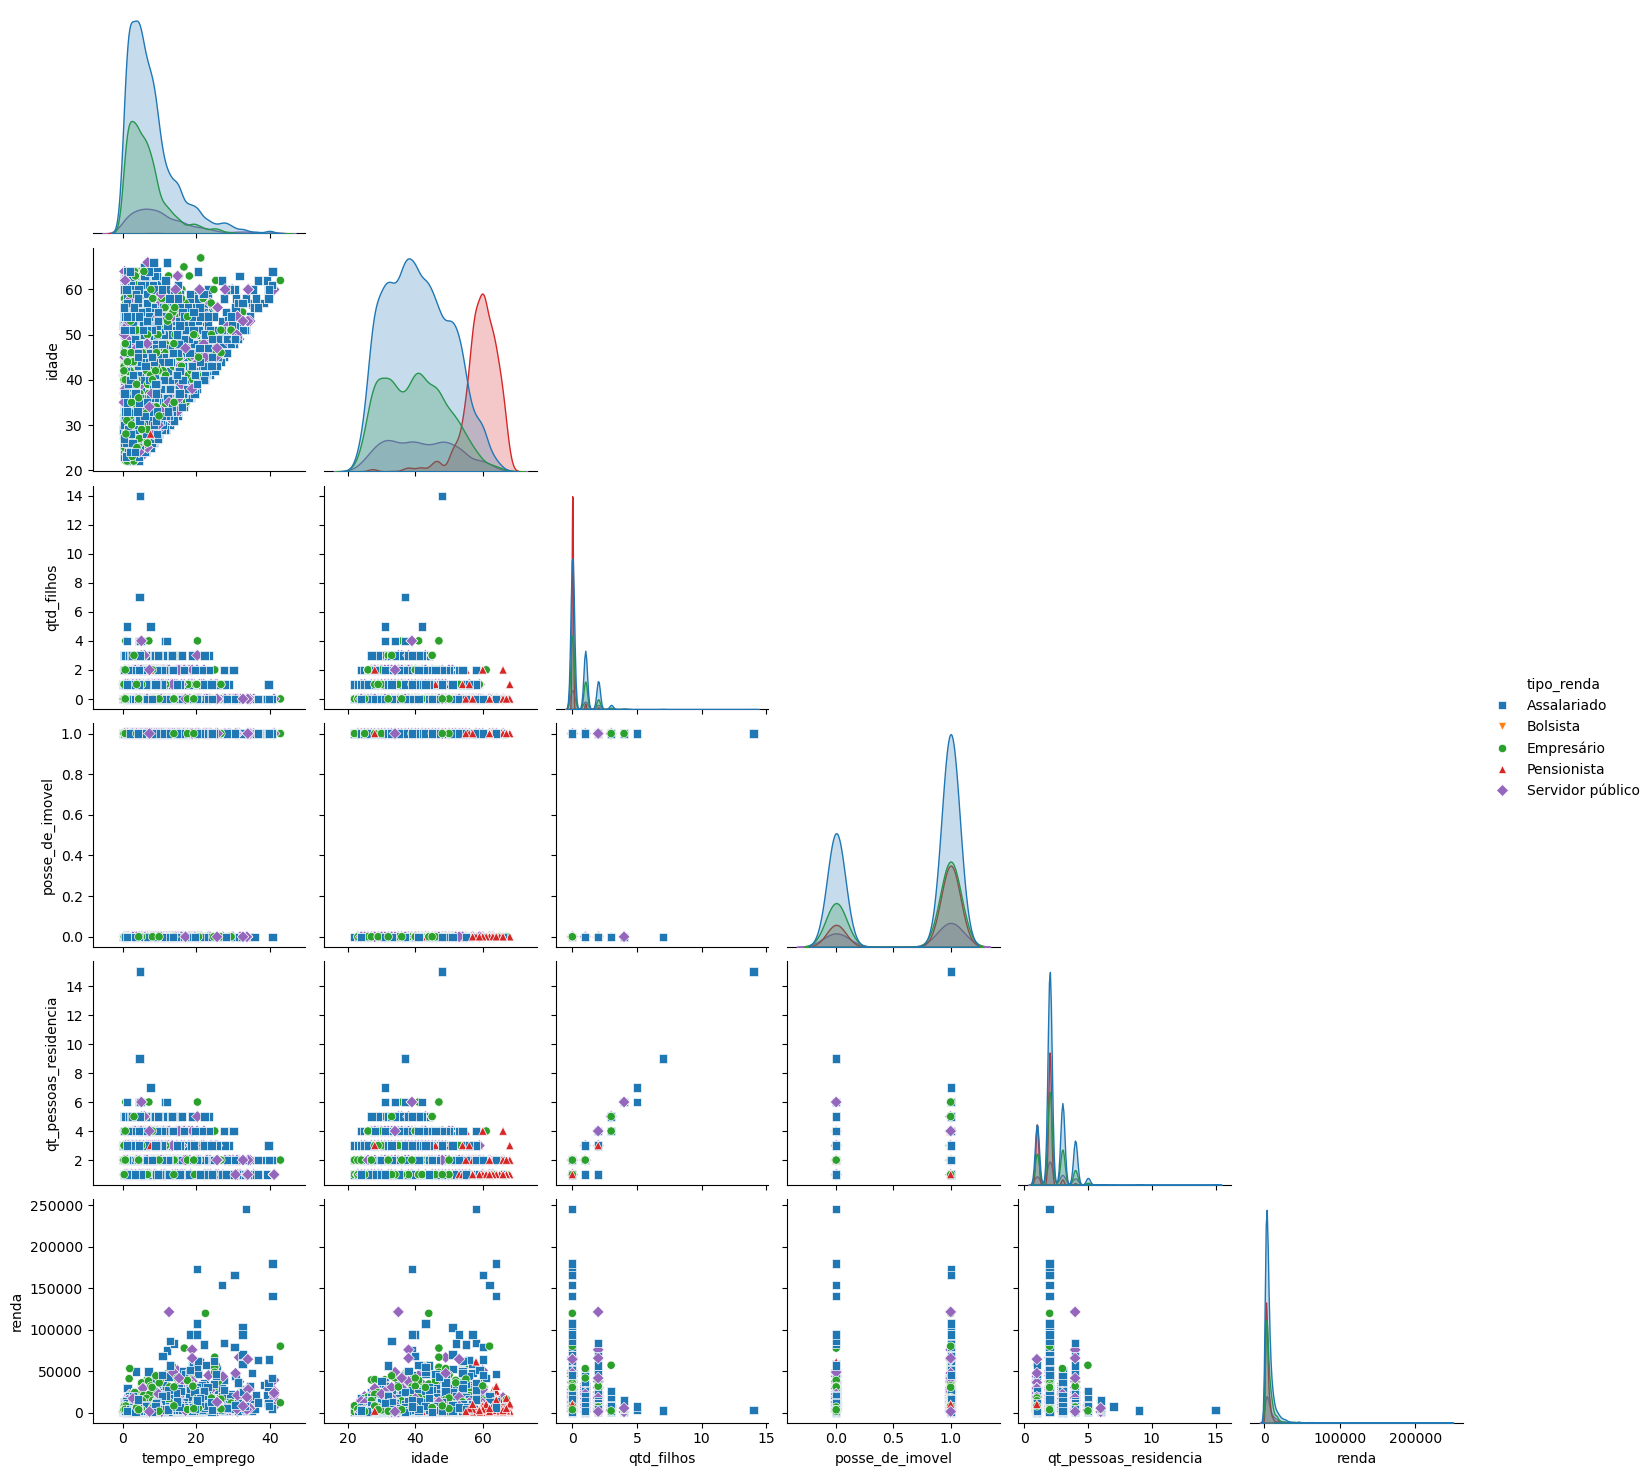

In [54]:
sns.pairplot(
    data=renda,
    hue="tipo_renda",
    hue_order=['Assalariado', 'Bolsista', 'Empres√°rio', 'Pensionista', 'Servidor p√∫blico'],
    vars=['tempo_emprego', 'idade', 'qtd_filhos', 'posse_de_imovel', 'qt_pessoas_residencia', 'renda'],
    markers=["o", "s", "D", "^", "v"],  # Adicione mais marcadores aqui
    corner=True
)

plt.show()

Ao analisar o pairplot, que consiste na matriz de dispers√£o, √© poss√≠vel identificar alguns outliers na vari√°vel renda, os quais podem afetar o resultado da an√°lise de tend√™ncia, apesar de ocorrerem com baixa frequ√™ncia. Al√©m disso, √© observada uma baixa correla√ß√£o entre praticamente todas as vari√°veis quantitativas, refor√ßando os resultados obtidos na matriz de correla√ß√£o.

#### Heatmap

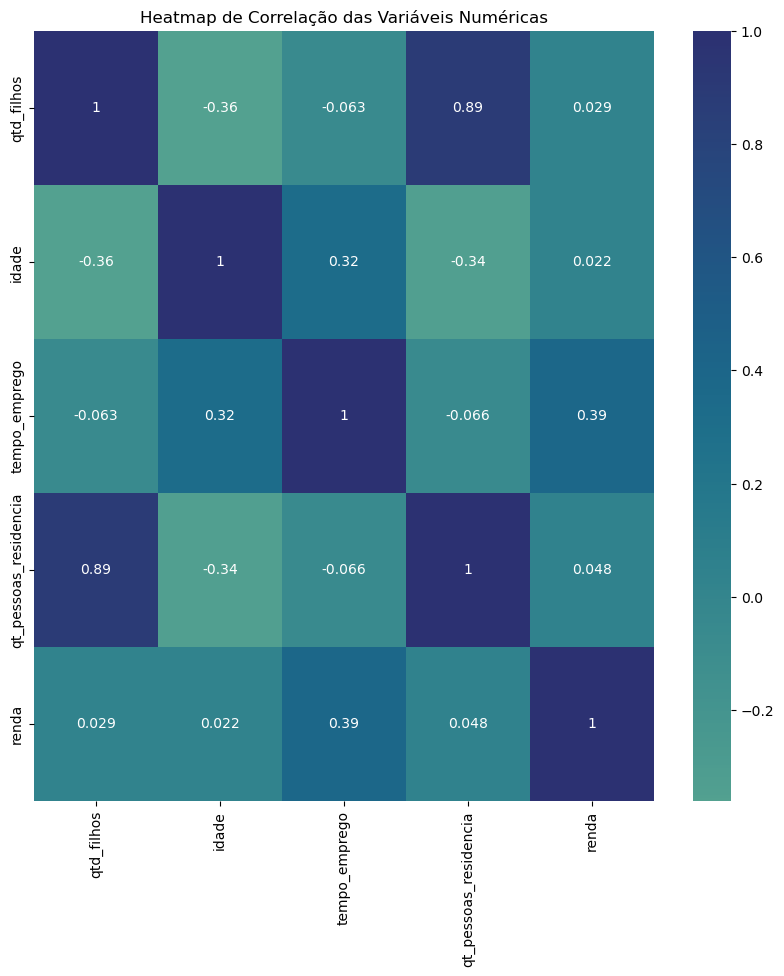

In [28]:
# Seleciona apenas colunas num√©ricas
renda_num = list(renda.select_dtypes(include='number').columns)

# Verifica se as colunas a serem removidas existem e as remove da lista de colunas num√©ricas
colunas_para_remover = ['Unnamed: 0', 'id_cliente']
colunas_para_remover = [col for col in colunas_para_remover if col in renda.columns]

# Remove as colunas indesejadas da sele√ß√£o de dados num√©ricos
renda_num = [col for col in renda_num if col not in colunas_para_remover]

# Criar o gr√°fico de heatmap
plt.figure(figsize=(10, 10))
plt.title('Heatmap de Correla√ß√£o das Vari√°veis Num√©ricas')

# Gerar e exibir o heatmap de correla√ß√£o
sns.heatmap(
    renda[renda_num].corr(),
    annot=True,
    center=0,
    cmap='crest'
)

# Exibir o gr√°fico
plt.show()

Com o heatmap, √© poss√≠vel refor√ßar novamente os resultados de baixa correla√ß√£o com a vari√°vel renda.

#### Linha de tend√™ncia

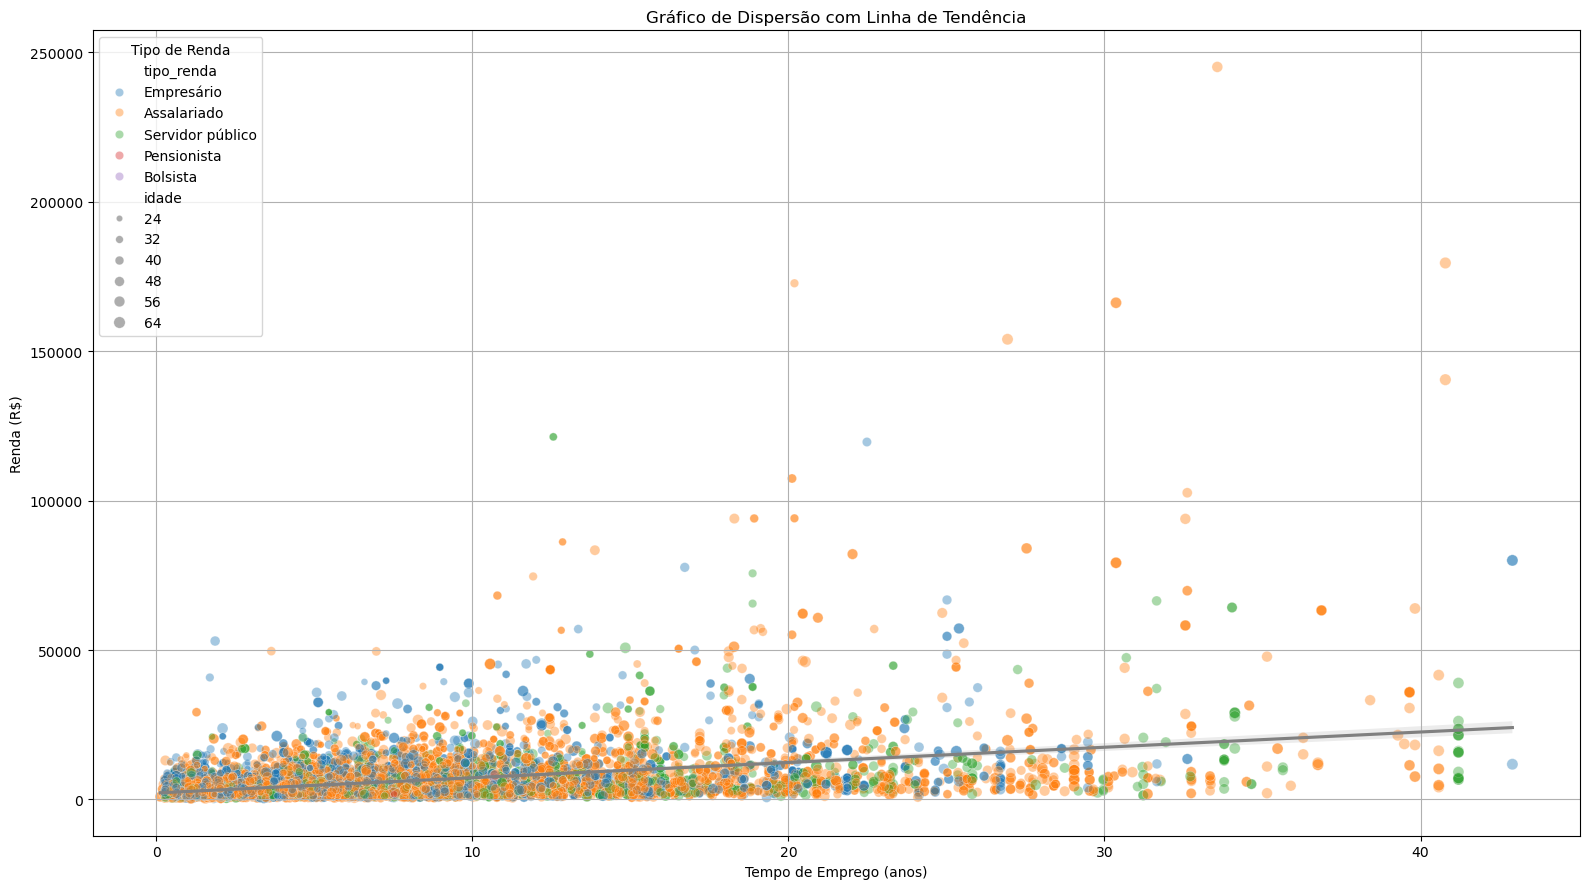

In [77]:
# Definir o tamanho padr√£o para os gr√°fico
plt.figure(figsize=(16,9))

sns.scatterplot(
    x='tempo_emprego',
    y='renda', 
    hue='tipo_renda', 
    size='idade',
    data=renda,
    alpha=0.4
)

sns.regplot(
    x='tempo_emprego', 
    y='renda', 
    data=renda, 
    scatter=False, 
    color='gray'
)

plt.title('Gr√°fico de Dispers√£o com Linha de Tend√™ncia')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Renda (R$)')
plt.legend(title='Tipo de Renda')
plt.grid(True)
plt.tight_layout()


plt.show()

#### An√°lise da distribui√ß√£o da vari√°vel renda em fun√ß√£o da vari√°vel tempo_emprego:

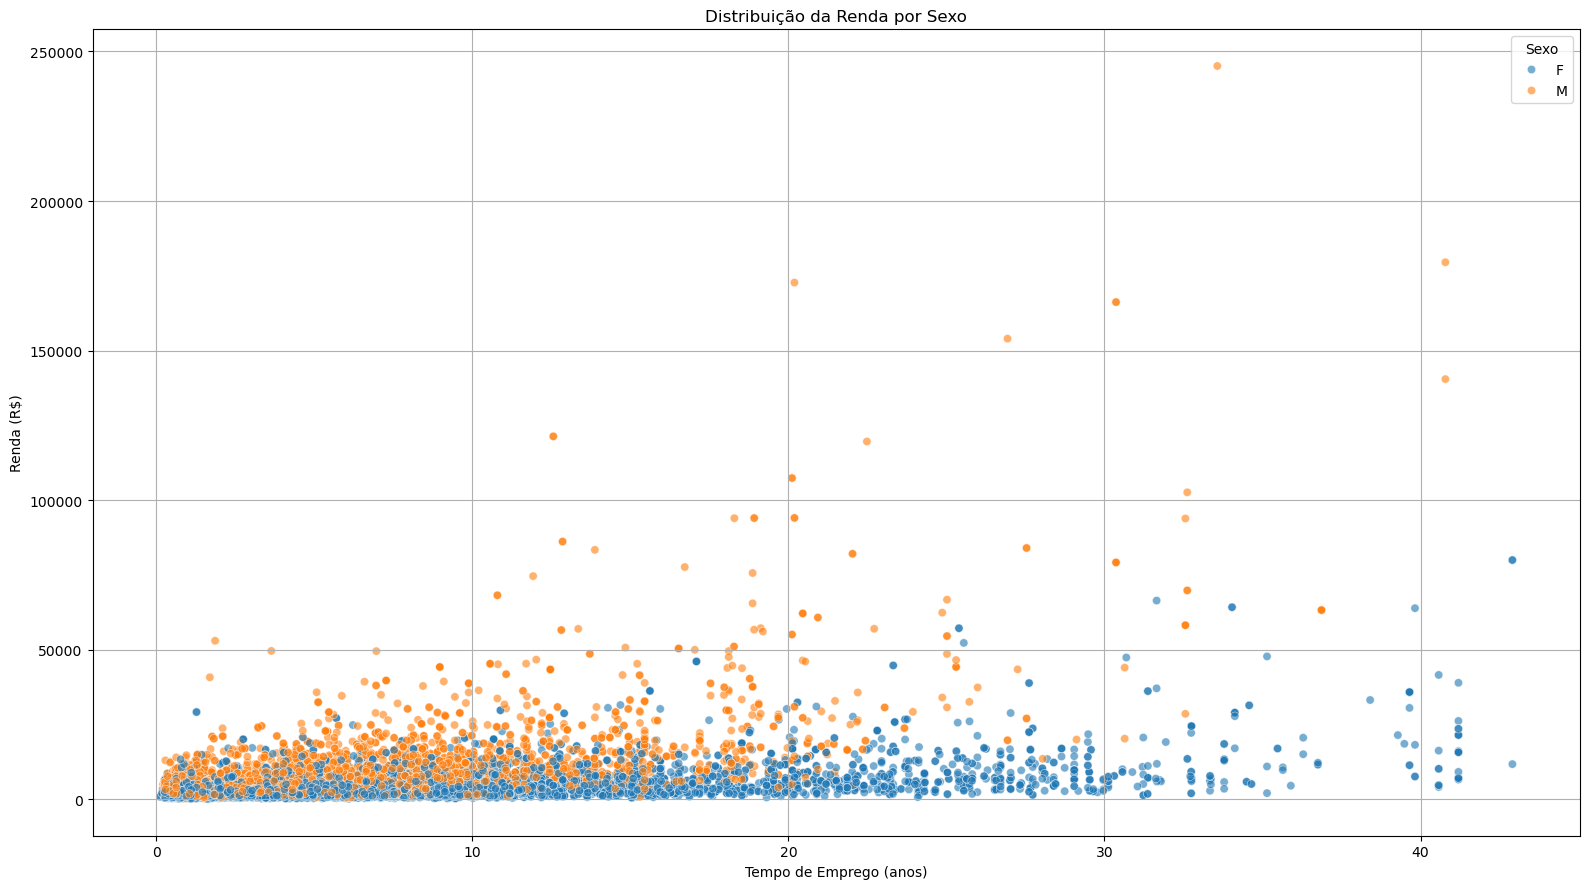

In [78]:
# Definir o tamanho padr√£o para os gr√°fico
plt.figure(figsize=(16,9))

sns.scatterplot(
    data=renda, 
    x='tempo_emprego', 
    y='renda', 
    hue='sexo',
    alpha=0.6
)

plt.title('Distribui√ß√£o da Renda por Sexo')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Renda (R$)')
plt.legend(title='Sexo')
plt.grid(True)
plt.tight_layout()

# Exibir o segundo gr√°fico
plt.show()

#### An√°lise das vari√°veis categ√≥ricas em rela√ß√£o a renda

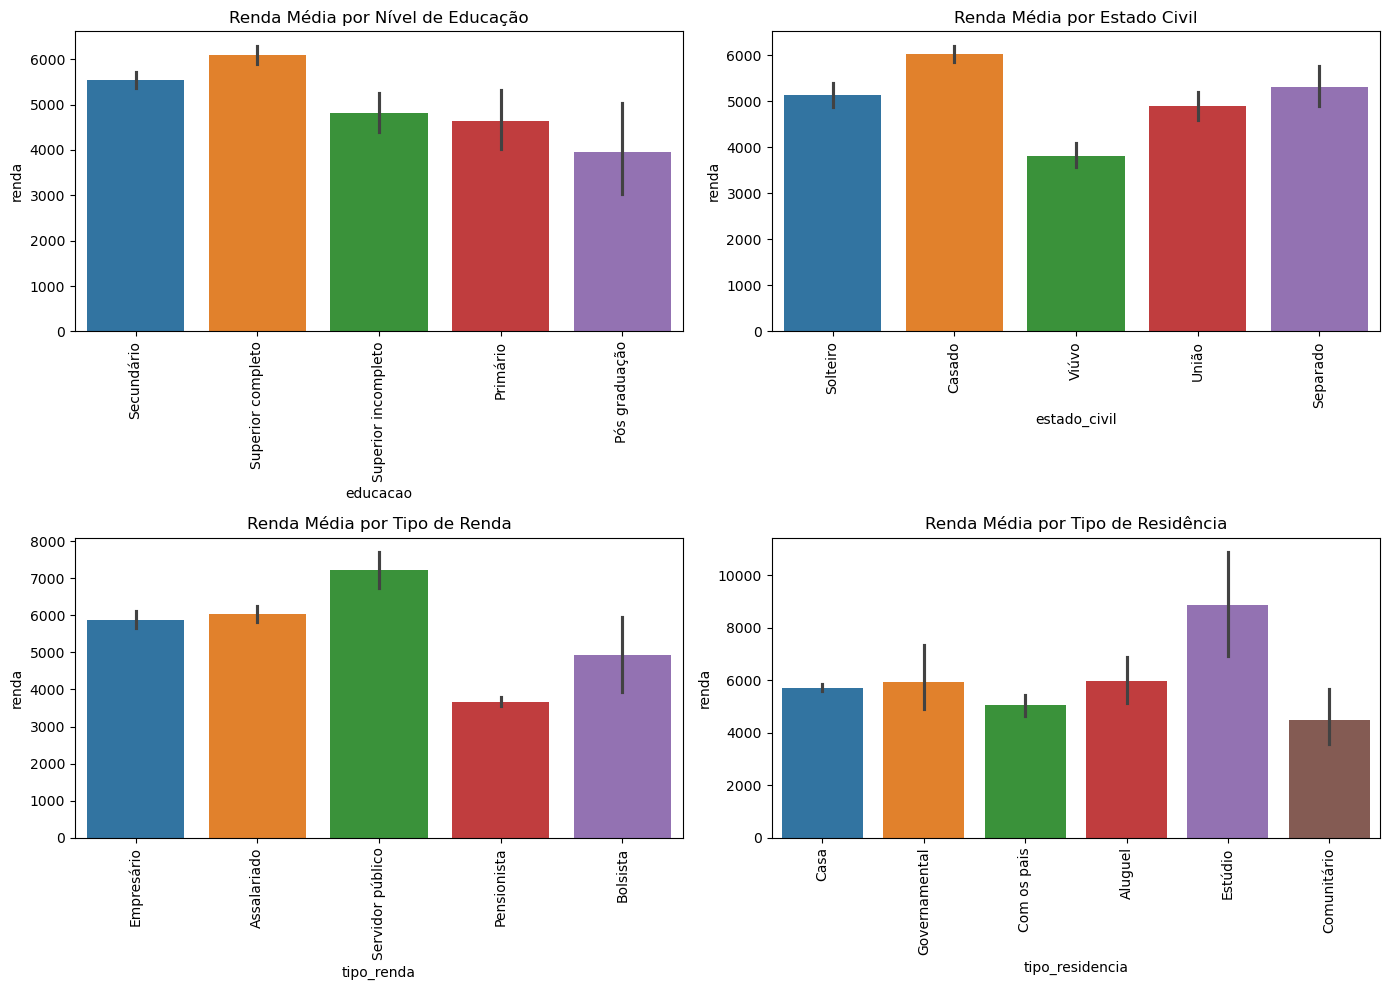

In [79]:
# Calculando a m√©dia da renda
renda_media = renda['renda'].mean()

# Gr√°ficos adicionais com layout em grade
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gr√°fico 1: Renda M√©dia por N√≠vel de Educa√ß√£o
sns.barplot(
    x="educacao", y="renda", data=renda, ax=axes[0, 0], hue="educacao", dodge=False
)
axes[0, 0].set_title("Renda M√©dia por N√≠vel de Educa√ß√£o")
axes[0, 0].tick_params(axis='x', rotation=90)

# Gr√°fico 2: Renda M√©dia por Estado Civil
sns.barplot(
    x="estado_civil", y="renda", data=renda, ax=axes[0, 1], hue="estado_civil", dodge=False
)
axes[0, 1].set_title("Renda M√©dia por Estado Civil")
axes[0, 1].tick_params(axis='x', rotation=90)

# Gr√°fico 3: Renda M√©dia por Tipo de Renda
sns.barplot(
    x="tipo_renda", y="renda", data=renda, ax=axes[1, 0], hue="tipo_renda", dodge=False
)
axes[1, 0].set_title("Renda M√©dia por Tipo de Renda")
axes[1, 0].tick_params(axis='x', rotation=90)

# Gr√°fico 4: Renda M√©dia por Tipo de Resid√™ncia
sns.barplot(
    x="tipo_residencia", y="renda", data=renda, ax=axes[1, 1], hue="tipo_residencia", dodge=False
)
axes[1, 1].set_title("Renda M√©dia por Tipo de Resid√™ncia")
axes[1, 1].tick_params(axis='x', rotation=90)

# Ajustar o layout para que os gr√°ficos n√£o sobreponham
plt.tight_layout()

# Exibir os gr√°ficos
plt.show()

## Etapa 3 Crisp-DM: Prepara√ß√£o dos dados
Nessa etapa realizamos tipicamente as seguintes opera√ß√µes com os dados:

 - **sele√ß√£o**: J√° temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **constru√ß√£o**: constru√ß√£o de novas vari√°veis
 - **integra√ß√£o**: Temos apenas uma fonte de dados, n√£o √© necess√°rio integra√ß√£o
 - **formata√ß√£o**: Os dados j√° se encontram em formatos √∫teis?



In [31]:
renda.drop(columns=['data_ref', 'id_cliente'], axis=1, inplace=True)

In [32]:
renda.head()

Unnamed: 0 sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0           0    F             False             True           0   
1           1    M              True             True           0   
2           2    F              True             True           0   
3           3    F             False             True           1   
4           4    M              True            False           0   

         tipo_renda           educacao estado_civil tipo_residencia  idade  \
0        Empres√°rio         Secund√°rio     Solteiro            Casa     26   
1       Assalariado  Superior completo       Casado            Casa     28   
2        Empres√°rio  Superior completo       Casado            Casa     35   
3  Servidor p√∫blico  Superior completo       Casado            Casa     30   
4       Assalariado         Secund√°rio     Solteiro   Governamental     33   

   tempo_emprego  qt_pessoas_residencia    renda  
0       6.602740                    1.0  8060.34  
1       7.183562                    2.0  1852.15  
2       0.838356                    2.0  2253.89  
3       4.846575                    3.0  6600.77  
4       4.293151                    1.0  6475.97

In [24]:
#Verificando se h√° dados faltantes em nossa base de dados, podemos verificar que n√£o h√°
renda.isna().value_counts()

Unnamed: 0  sexo   posse_de_veiculo  posse_de_imovel  qtd_filhos  tipo_renda  educacao  estado_civil  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia  renda
False       False  False             False            False       False       False     False         False            False  False          False                  False    12427
                                                                                                                              True           False                  False     2573
Name: count, dtype: int64

In [33]:
renda_dummies = pd.get_dummies(data=renda)
renda_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     15000 non-null  int64  
 1   posse_de_veiculo               15000 non-null  bool   
 2   posse_de_imovel                15000 non-null  bool   
 3   qtd_filhos                     15000 non-null  int64  
 4   idade                          15000 non-null  int64  
 5   tempo_emprego                  12427 non-null  float64
 6   qt_pessoas_residencia          15000 non-null  float64
 7   renda                          15000 non-null  float64
 8   sexo_F                         15000 non-null  bool   
 9   sexo_M                         15000 non-null  bool   
 10  tipo_renda_Assalariado         15000 non-null  bool   
 11  tipo_renda_Bolsista            15000 non-null  bool   
 12  tipo_renda_Empres√°rio          15000 non-null

In [37]:
(renda_dummies.corr()['renda']
              .sort_values(ascending=False)
              .to_frame()
              .reset_index()
              .rename(columns={'index':'var', 
                               'renda':'corr'})
              .style.bar(color=['red', 'lightgreen'], align=0)
)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a constru√ß√£o do modelo. Os passos t√≠picos s√£o:
- Selecionar a t√©cnica de modelagem
- Desenho do teste
- Avalia√ß√£o do modelo


In [80]:
# Pr√©-processamento dos dados
categorical_columns = renda.select_dtypes(include=['object']).columns.tolist()
print("Colunas categ√≥ricas identificadas:", categorical_columns)

# Convertendo colunas categ√≥ricas em vari√°veis dummies
renda_dummies = pd.get_dummies(renda, columns=categorical_columns, drop_first=True)

# Definindo as vari√°veis X e y
X = renda_dummies.drop(['renda'], axis=1).copy()
y = renda_dummies['renda']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Treinamento do Modelo 1: Random Forest com profundidade m√°xima 2
modelo_1 = RandomForestRegressor(max_depth=2, random_state=42)
modelo_1.fit(X_train, y_train)

# Treinamento do Modelo 2: Random Forest com profundidade m√°xima 8
modelo_2 = RandomForestRegressor(max_depth=8, random_state=42)
modelo_2.fit(X_train, y_train)

# Calculando o R¬≤ para os dois modelos
mse1 = modelo_1.score(X_test, y_test)
mse2 = modelo_2.score(X_test, y_test)

print(f"O R¬≤ do modelo 1 (max_depth=2) √© {mse1:.4f}")
print(f"O R¬≤ do modelo 2 (max_depth=8) √© {mse2:.4f}")

Colunas categ√≥ricas identificadas: ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
O R¬≤ do modelo 1 (max_depth=2) √© 0.2922
O R¬≤ do modelo 2 (max_depth=8) √© 0.3286


In [81]:
# Ajustando o Modelo 2 com par√¢metros adicionais
modelo_2 = RandomForestRegressor(max_depth=8, min_samples_leaf=4, random_state=42)
modelo_2.fit(X_train, y_train)
mse1 = modelo_2.score(X_test, y_test)

print(f"O R¬≤ do modelo 2 ajustado (max_depth=8, min_samples_leaf=4) √© {mse1:.4f}")

O R¬≤ do modelo 2 ajustado (max_depth=8, min_samples_leaf=4) √© 0.3397


### Rodando o modelo


#### Visualiza√ß√£o gr√°fica da √°rvore com plot_tree

Treinando e visualizando um modelo de DecisionTreeRegressor...
O R¬≤ do modelo DecisionTreeRegressor (max_depth=8, min_samples_leaf=4) √© 0.2533


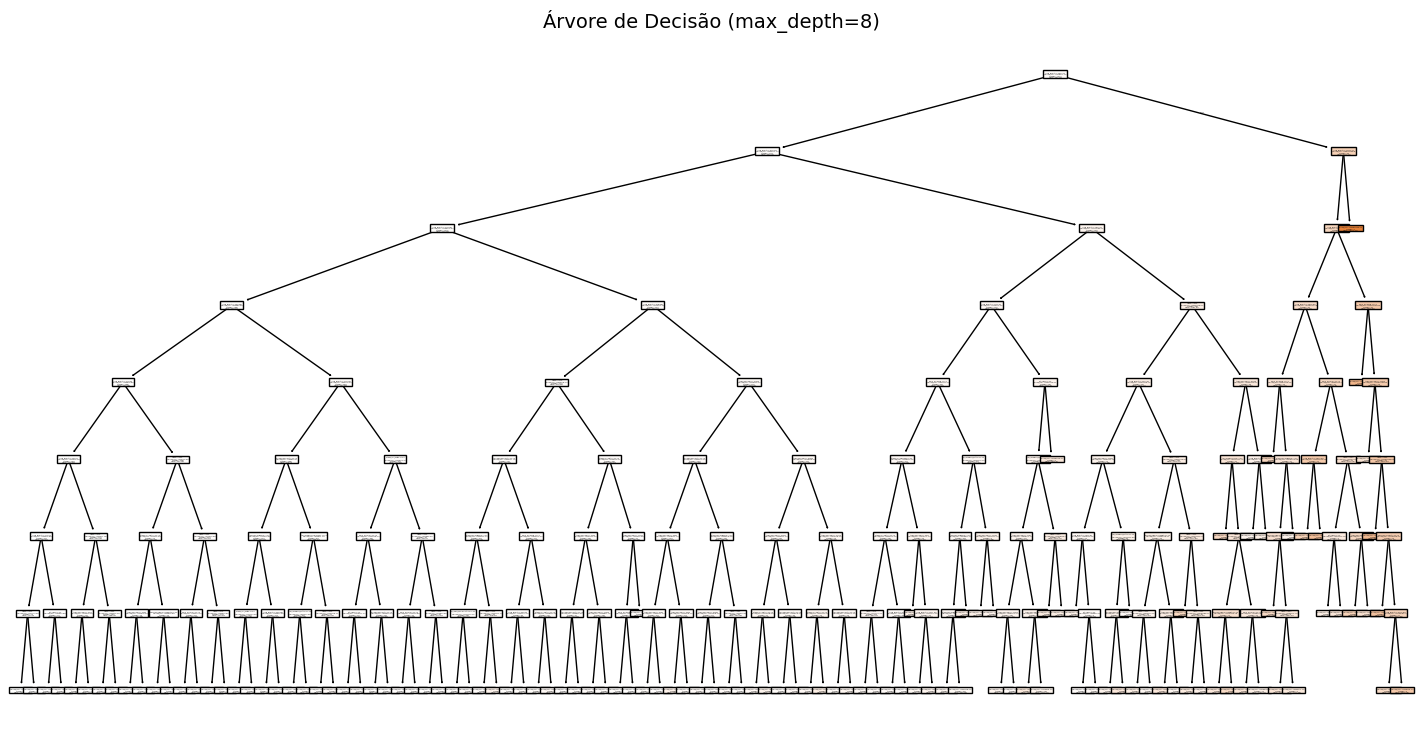

In [82]:
# Treinamento e visualiza√ß√£o do modelo de DecisionTreeRegressor
print("Treinando e visualizando um modelo de DecisionTreeRegressor...")
modelo_dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)
modelo_dt.fit(X_train, y_train)

# Avalia√ß√£o do modelo
r2_dt = modelo_dt.score(X_test, y_test)
print(f"O R¬≤ do modelo DecisionTreeRegressor (max_depth=8, min_samples_leaf=4) √© {r2_dt:.4f}")

# Visualizando a √°rvore de decis√£o
fig, ax = plt.subplots(figsize=(18, 9))
plot_tree(modelo_dt, feature_names=X.columns, filled=True)
plt.title("√Årvore de Decis√£o (max_depth=8)", fontsize=14)
plt.show()

#### Teste da melhor profundidade e do n√∫mero m√≠nimo de amostras por folha da √°rvore:

Iniciando otimiza√ß√£o de par√¢metros...


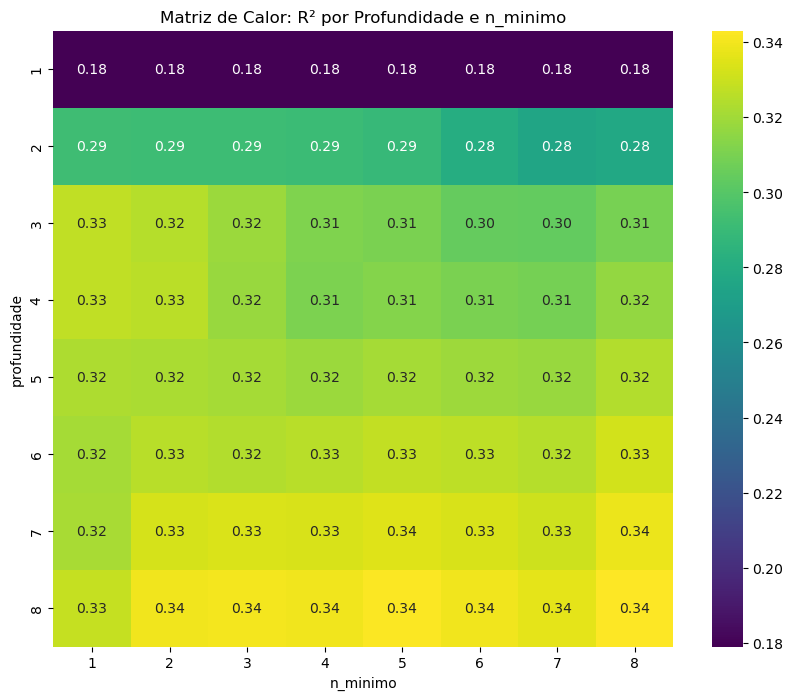

In [83]:
# Otimiza√ß√£o de par√¢metros (max_depth e min_samples_leaf)
r2s = []
i_indicador = []
j_indicador = []

print("Iniciando otimiza√ß√£o de par√¢metros...")
for i in range(1, 9):
    for j in range(1, 9):
        modelo_2 = RandomForestRegressor(max_depth=i, min_samples_leaf=j, random_state=42)
        modelo_2.fit(X_train, y_train)
        r2_1 = modelo_2.score(X_test, y_test)
        r2s.append(r2_1)
        i_indicador.append(i)
        j_indicador.append(j)

# Criando o DataFrame para R¬≤
renda_r2 = pd.DataFrame({'r2': r2s, 'profundidade': i_indicador, 'n_minimo': j_indicador})

# Criando a matriz de calor (heatmap)
fig, ax = plt.subplots(figsize=(10, 8))
pivot_table = renda_r2.pivot(index='profundidade', columns='n_minimo', values='r2')
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.2f', ax=ax)
ax.set_title('Matriz de Calor: R¬≤ por Profundidade e n_minimo')
plt.show()

In [84]:
# Configura√ß√£o para Grid Search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000],
}   

# Cria√ß√£o do modelo inicial
rf = RandomForestRegressor(max_depth=7, min_samples_leaf=7, random_state=42)

# Realiza√ß√£o do grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_

print("Melhor modelo encontrado pelo GridSearchCV:")
print(best_model)

Melhor modelo encontrado pelo GridSearchCV:
RandomForestRegressor(max_depth=7, min_samples_leaf=7, n_estimators=1000,
                      random_state=42)


In [85]:
# Ajustando o modelo final com os melhores par√¢metros
modelo_final = RandomForestRegressor(max_depth=7, min_samples_leaf=7, n_estimators=500, random_state=42)
modelo_final.fit(X_train, y_train)

# Previs√µes do modelo final
y_pred = modelo_final.predict(X_test)

# Exibindo o R¬≤ do modelo final
r2_final = modelo_final.score(X_test, y_test)
print(f"O R¬≤ do modelo final (max_depth=7, min_samples_leaf=7, n_estimators=500) √© {r2_final:.4f}")

# Exibindo os primeiros resultados de previs√µes
resultados = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print("Primeiros resultados das previs√µes:")
print(resultados.head(10))

# M√©tricas adicionais
index = ['r_squared', 'mean_absolute_error', 'root_mean_squared_error']

O R¬≤ do modelo final (max_depth=7, min_samples_leaf=7, n_estimators=500) √© 0.3338
Primeiros resultados das previs√µes:
           Real      Previsto
11499   3479.22   3026.262280
6475    4867.69   2725.888535
13167  23610.27  20011.169037
862      707.96   2735.230791
5970    4349.39   6725.517253
6706   15289.23   3564.531231
3017    1918.32   4150.624640
3781    3724.31  10094.398646
3898    1281.22   2972.881982
2250    5746.69   4204.664004


In [86]:
hiperpametros = pd.DataFrame({'conjunto_treino': r2_score(y_train, modelo_final.predict(X_train))}, index=index)
hiperpametros.loc['mean_absolute_error', 'conjunto_treino'] = mean_absolute_error(y_train, modelo_final.predict(X_train))
hiperpametros.loc['root_mean_squared_error', 'conjunto_treino'] = mean_squared_error(y_train, modelo_final.predict(X_train)) ** 0.5
hiperpametros['conjunto_teste'] = r2_score(y_test, modelo_final.predict(X_test))
hiperpametros.loc['mean_absolute_error', 'conjunto_teste'] = mean_absolute_error(y_test, modelo_final.predict(X_test))
hiperpametros.loc['root_mean_squared_error', 'conjunto_teste'] = mean_squared_error(y_test, modelo_final.predict(X_test)) ** 0.5

print("M√©tricas finais:")
print(hiperpametros)

M√©tricas finais:
                         conjunto_treino  conjunto_teste
r_squared                       0.621988        0.333790
mean_absolute_error          2820.179092     3079.415319
root_mean_squared_error      5259.176430     5713.525195


## Etapa 5 Crisp-DM: Avalia√ß√£o dos resultados


In [87]:
# Avalia√ß√£o da √°rvore de regress√£o
r2_train = modelo_dt.score(X=X_train, y=y_train)
r2_test = modelo_dt.score(X=X_test, y=y_test)

template = 'O coeficiente de determina√ß√£o (ùëÖ2) da √°rvore com profundidade = {0} para a base de {1} √©: {2:.2f}'

print(template.format(modelo_dt.get_depth(), 'treino', r2_train).replace(".", ","))
print(template.format(modelo_dt.get_depth(), 'teste', r2_test).replace(".", ","), '\n')

O coeficiente de determina√ß√£o (ùëÖ2) da √°rvore com profundidade = 8 para a base de treino √©: 0,65
O coeficiente de determina√ß√£o (ùëÖ2) da √°rvore com profundidade = 8 para a base de teste √©: 0,25 



In [88]:
renda['renda_predict'] = np.round(modelo_dt.predict(X), 2)
renda[['renda', 'renda_predict']]

renda  renda_predict
0       8060.34        3042.84
1       1852.15        9860.40
2       2253.89        2885.76
3       6600.77        2822.58
4       6475.97        4605.93
...         ...            ...
14995   7990.58        4668.19
14996  10093.45        3525.31
14997    604.82        3525.31
14998   3352.27        4618.71
14999   1160.99        2822.58

[15000 rows x 2 columns]

## Etapa 6 Crisp-DM: Implanta√ß√£o
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decis√µes com algum n√≠vel de automa√ß√£o.

### Simulando a previs√£o de renda

In [90]:
# Foi criado as vari√°veis dummies para a entrada
entrada_dummies = pd.get_dummies(entrada)

# Em seguida, as colunas foram alinhadas para que correspondam exatamente √†s do conjunto de treinamento
entrada_alinhada = entrada_dummies.reindex(columns=X.columns, fill_value=0)

# Previs√£o com o modelo de √°rvore de decis√£o
renda_estimada = modelo_dt.predict(entrada_alinhada).item()

# Exibindo o resultado
print(f"Renda estimada: R${str(np.round(renda_estimada, 2)).replace('.', ',')}")


Renda estimada: R$1615,26
